<h1 style="color:rgb(0,120,170)">Assignment 7: Neural Networks and a Glimpse at Pytorch </h1>

<h2 style="color:rgb(0,120,170)">Copyrighting and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - your 8-digit student number on ID card (without k)</li>
</ol>

**Example:**<br>
 ✅ Assignment_0_RenéDescartes_12345678<br>
 ✅ Assignment_0_SørenAabyeKierkegaard_12345678<br>
 ❌ Assignment0_Peter_Pan_k12345678

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

*Good luck!*

<h2 style="color:rgb(0,120,170)">Task 1: The XOR Problem</h2>

**Task 1.1.**

In this task we try to formalize the fact that a single layer neural network (NN) cannot solve the XOR problem, but a two layer network can. 

Let us assume that we only have four possible inputs $\mathbf{x}_1 = (0,0)$,
$\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$ with the following labels $y_1=0$, $y_2=1$, $y_3=1$, and $y_4=0$, respectively. Note that this exactly describes the XOR function: it outputs 1 (=true) if and only if exactly one of the input components equals 1 (=true).

* As a first task show that if we use a linear network
$
    g_1(\mathbf{x};\mathbf{w})= \mathbf{x} \cdot \mathbf{w} = x^{(1)} w_1 + x^{(2)}  w_2,
$
 it is impossible to find parameters $w_1$ and $w_2$
  that solve this problem exactly.
  
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

1. Consider the linear network:
   $\[ g_1(\mathbf{x};\mathbf{w}) = \mathbf{x} \cdot \mathbf{w} = x^{(1)} w_1 + x^{(2)} w_2, \]$
   where $\( \mathbf{x} = (x^{(1)}, x^{(2)}) \)$ and $\( \mathbf{w} = (w_1, w_2) \)$.

2. Define the XOR problem with the following inputs and labels:
   $\(\mathbf{x}_1 = (0,0)\)$ with $\(y_1 = 0\)$,
   $\(\mathbf{x}_2 = (1,0)\)$ with $\(y_2 = 1\)$,
   $\(\mathbf{x}_3 = (0,1)\)$ with $\(y_3 = 1\)$,
   $\(\mathbf{x}_4 = (1,1)\)$ with $\(y_4 = 0\)$.

3. Analyze the linear network's output for these inputs:
   $\[ g_1(\mathbf{x}_1) = 0, \]$
   $\[ g_1(\mathbf{x}_2) = w_1, \]$
   $\[ g_1(\mathbf{x}_3) = w_2, \]$
   $\[ g_1(\mathbf{x}_4) = w_1 + w_2. \]$

4. Notice that for $\(\mathbf{x}_2\)$ and $\(\mathbf{x}_3\)$, where exactly one input component is 1,
   the linear combination cannot yield 1 for one case and 0 for the other, as changing $\(x^{(1)}\)$ or $\(x^{(2)}\)$
   will proportionally change the output.

5. Therefore, it is impossible to find parameters $\(w_1\)$ and $\(w_2\)$ that make the linear network $\(g_1\)$
   satisfy the XOR conditions exactly. The linear network is not expressive enough to capture
   the non-linear relationship required for solving the XOR problem.




**Task 1.2.**

Even by adding bias units or by applying a sigmoid, the problem cannot be solved. 

However, as soon as we use a two-layer network with a simple non-linear activation function (ReLU):

$$   
g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}),
$$

we can find parameters, that solve the problem. 
   * Precisely, show that $\mathbf{W}^{[1]}=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$,
    $\mathbf{b}=\begin{pmatrix} 0 \\ -1 \end{pmatrix}$, and $\mathbf{W}^{[2]}=\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ solve the problem
    in an exact way. The transformation $\max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b})$ has 
    mapped the points $ \mathbf{x}_1,\ldots,  \mathbf{x}_4$ into a space, in which those data points are 
    linearly separable. 
    
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>
Let us first define the ReLU function:
$$ \text{ReLU}(x) = \max(0, x). $$
The ReLU function is a non-linear function that is applied element-wise to a vector $\mathbf{x}$.
The ReLU function is used as the activation function in the hidden layer of the network $\(g_2\)$.
The output layer of the network $\(g_2\)$ uses the identity function as the activation function.

The network $\(g_2\)$ is defined as:
$$ g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b}) = \mathbf{W}^{[2]T} \max(0, \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}). $$
The network $\(g_2\)$ has three parameters: $\mathbf{W}^{[1]}$, $\mathbf{W}^{[2]}$, and $\mathbf{b}$.
The parameter $\mathbf{W}^{[1]}$ is a $2 \times 2$ matrix, $\mathbf{W}^{[2]}$ is a $2 \times 1$ matrix, and $\mathbf{b}$ is a $2 \times 1$ matrix.
The network $\(g_2\)$ is a two-layer network with a hidden layer and an output layer.
The hidden layer has two units and the output layer has one unit.

$\begin{align*}
\mathbf{W}^{[1]} &= \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}, \\
\mathbf{b} &= \begin{pmatrix} 0 \\ -1 \end{pmatrix}, \\
\mathbf{W}^{[2]} &= \begin{pmatrix} 1 \\ -2 \end{pmatrix}.
\end{align*}$

The transformation inside the ReLU function is then:
$$
\max(0, \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}) = \max\left(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \mathbf{x} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}\right).
$$

Evaluate this for the XOR inputs:
$\begin{align*}
\text{For } \mathbf{x}_1 = (0,0): \quad & \max(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}) = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \\
\text{For } \mathbf{x}_2 = (1,0): \quad & \max(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}) = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \\
\text{For } \mathbf{x}_3 = (0,1): \quad & \max(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}) = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \\
\text{For } \mathbf{x}_4 = (1,1): \quad & \max(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}) = \begin{pmatrix} 2 \\ 1 \end{pmatrix}.
\end{align*}$


Evaluate the final output with $\mathbf{W}^{[2]T}$:
$\begin{align*}
\mathbf{W}^{[2]T} \max(0, \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}) &= \begin{pmatrix} 1 & -2 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \end{pmatrix} = 0, \\
\begin{pmatrix} 1 & -2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} &= 1, \\
\begin{pmatrix} 1 & -2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} &= 1, \\
\begin{pmatrix} 1 & -2 \end{pmatrix} \begin{pmatrix} 2 \\ 1 \end{pmatrix} &= 0.
\end{align*}$

The output of the network $\(g_2\)$ is then:
$$
\begin{align*}
g_2(\mathbf{x}_1) &= 0, \\
g_2(\mathbf{x}_2) &= 1, \\
g_2(\mathbf{x}_3) &= 1, \\
g_2(\mathbf{x}_4) &= 0.
\end{align*}
$$

The output of the network $\(g_2\)$ is then mapped to the labels $y_1, \ldots, y_4$:
$$
\begin{align*}
g_2(\mathbf{x}_1) &= 0 \rightarrow y_1 = 0, \\
g_2(\mathbf{x}_2) &= 1 \rightarrow y_2 = 1, \\
g_2(\mathbf{x}_3) &= 1 \rightarrow y_3 = 1, \\
g_2(\mathbf{x}_4) &= 2 \rightarrow y_4 = 0.
\end{align*}
$$

As shown, the output now correctly classifies the XOR inputs: 0, 1, 1, 0. The network $\(g_2\)$ solves the XOR problem exactly. The non-linear transformation inside the ReLU function has mapped the points $\mathbf{x}_1, \ldots, \mathbf{x}_4$ into a space where they are linearly separable.



   



<h2 style="color:rgb(0,120,170)">Task 2: Backprop of a Simple NN</h2>

Consider the following neural network (we try to adapt to the notation from the lecture):
<div>
<img src="nn_pic.png" width="500"/>
</div>

The preactivations of the hidden units are denoted as $s_3$, $s_4$ and $s_5$  from left to right, their activations as $a_3$, $a_4$ and $a_5$, respectively. In the hidden layer we use ReLU as activation function, i.e. $f_3(x)=f_4(x)=f_5(x)=\text{ReLU}(x)$, and in the output layer the activation is the identity function. The preactivation of the output layer is denoted as $s_6$ and the output as $\hat{y}$. The delta at the output is denoted as $\delta_6$, and the hidden deltas as $\delta_3$, $\delta_4$ and $\delta_5$ from left to right, respectively. The true label is $y=1$ and as loss function we use the mean-squared loss, i.e $L(y,\hat{y})=\frac12 (y-\hat{y})^2$.

Given values:

- $x_1=1$
- $x_2=1.5$
- $w_{31}=-0.1$
- $w_{41}=-1$
- $w_{51}=0.1$
- $w_{32}=0.5$
- $w_{42}=0$
- $w_{52}=-2$
- $w_{63}=1.2$
- $w_{64}=-1$
- $w_{65}=0.5$

* Compute all outputs, preactivations, activations, and delta errors! Also compute $\frac{\partial L}{\partial w_{32}}$. Write down formulas (not only the numerical result) that indicate your computations at least for $s_3$, $\delta_3$ and $\frac{\partial L}{\partial w_{32}}$.
* Additionally finish the python code that calculates the same results.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

Formulas we are going to use:
$$
\begin{align*}
s_i &= \sum_{j} w_{ij} \cdot a_j, \\
a_i &= f_i(s_i), \\
\delta_i &= \frac{\partial L}{\partial s_i}, \\
\frac{\partial L}{\partial w_{ij}} &= \frac{\partial L}{\partial s_i} \cdot \frac{\partial s_i}{\partial w_{ij}} = \delta_i \cdot a_j.
\end{align*}
$$

The preactivations of the hidden units are:
$$
\begin{align*}
s_3 &= w_{31} \cdot x_1 + w_{32} \cdot x_2 = -0.1 \cdot 1 + 0.5 \cdot 1.5 = 0.65, \\
s_4 &= w_{41} \cdot x_1 + w_{42} \cdot x_2 = -1 \cdot 1 + 0 \cdot 1.5 = -1, \\
s_5 &= w_{51} \cdot x_1 + w_{52} \cdot x_2 = 0.1 \cdot 1 + -2 \cdot 1.5 = -2.9.
\end{align*}
$$

The activations of the hidden units are:
$$
\begin{align*}
a_3 &= f_3(s_3) = \text{ReLU}(s_3) = \max(0, s_3) = \max(0, 0.65) = 0.65, \\
a_4 &= f_4(s_4) = \text{ReLU}(s_4) = \max(0, s_4) = \max(0, -1) = 0, \\
a_5 &= f_5(s_5) = \text{ReLU}(s_5) = \max(0, s_5) = \max(0, -2.9) = 0.
\end{align*}
$$

The preactivation of the output unit is:
$$
\begin{align*}
s_6 &= w_{63} \cdot a_3 + w_{64} \cdot a_4 + w_{65} \cdot a_5 = 1.2 \cdot 0.65 + -1 \cdot 0 + 0.5 \cdot 0 = 0.78.
\end{align*}
$$

The activation of the output unit is:
$$
\begin{align*}
a_6 &= f_6(s_6) = s_6 = 0.78.
\end{align*}
$$  

The delta error of the output unit is:
$$
\begin{align*}
\delta_6 &= \frac{\partial L}{\partial s_6} = \frac{\partial L}{\partial a_6} \cdot \frac{\partial a_6}{\partial s_6} = (y - a_6) \cdot 1 = (1 - 0.78) \cdot 1 = 0.22.
\end{align*}
$$

The delta error of the hidden units are:
$$
\begin{align*}
\delta_3 &= \frac{\partial L}{\partial s_3} = \frac{\partial L}{\partial a_3} \cdot \frac{\partial a_3}{\partial s_3} = \delta_6 \cdot w_{63} \cdot \mathbb{1}_{\{s_3 > 0\}} = 0.22 \cdot 1.2 \cdot \mathbb{1}_{\{0.65 > 0\}} = 0.22 \cdot 1.2 \cdot 1 = 0.264, \\
\delta_4 &= \frac{\partial L}{\partial s_4} = \frac{\partial L}{\partial a_4} \cdot \frac{\partial a_4}{\partial s_4} = \delta_6 \cdot w_{64} \cdot \mathbb{1}_{\{s_4 > 0\}} = 0.22 \cdot -1 \cdot \mathbb{1}_{\{-1 > 0\}} = 0.22 \cdot -1 \cdot 0 = 0, \\
\delta_5 &= \frac{\partial L}{\partial s_5} = \frac{\partial L}{\partial a_5} \cdot \frac{\partial a_5}{\partial s_5} = \delta_6 \cdot w_{65} \cdot \mathbb{1}_{\{s_5 > 0\}} = 0.22 \cdot 0.5 \cdot \mathbb{1}_{\{-2.9 > 0\}} = 0.22 \cdot 0.5 \cdot 0 = 0.
\end{align*}
$$

The partial derivative of the loss function w.r.t. $w_{32}$ is:
$$
\begin{align*}
\frac{\partial L}{\partial w_{32}} &= \frac{\partial L}{\partial s_3} \cdot \frac{\partial s_3}{\partial w_{32}} = \delta_3 \cdot x_2 = 0.264 \cdot 1.5 = 0.396.
\end{align*}
$$

Output:
$$
\begin{align*}
\hat{y} &= a_6 = 0.78, \\
\end{align*}
$$




<h3 style="color:rgb(210,90,80)">Python implementation (15 points):</h3>

In [5]:
# Python Implementation
import numpy as np

# Notes on shapes of matrices:
# the pre-activations and activations should be row-vectors
# meaning shape = (1, ...). Think of it as having a mini-batch size of 1
# Check out the pytorch docs on the linear layer for the forward pass and the shape
# of the weight-layers ;)

input = np.array([1, 1.5]).reshape(1, -1)

weights_layer1 = np.array([[-0.1, 0.5], [-1, 0], [0.1, -2]])
weights_layer2 = np.array([[1.2, -1, 0.5]]).reshape(1, -1) #reshape(1, -1) results in shape (1, 3), was (3, 1)

assert weights_layer1.shape == (3, 2)
assert weights_layer2.shape == (1, 3)

# Note: Every function can be easily written as a small one-liner
# If you have bigger functions, maybe think of a better solution :)

def relu(x):
    """calculate relu activation of x"""
    relu = np.maximum(0, x)
    return relu

def derivative_relu(x):
    """calculate derivative of relu for input x"""
    der_relu = np.where(x > 0, 1, 0)   #np.where(condition, x, y) -> if condition is true, x, else y
    return der_relu

def calc_activation(preactivation):
    """calculate activation given pre-activation
    """
    a = relu(preactivation)
    return a

def calc_preactivation(x, w):
    """calculate preactivation of a linear layer
    
    x: layer inputs
    w: layer weights
    """
    s = np.dot(x, w.T)  #the same as sum(x_i * w_i) for i in range(len(x))
    return s

def calc_delta_6(y_hat, y):
    """delta error of last layer"""
    delta_6 = y - y_hat
    return delta_6

def calc_delta(s, delta_6, w):
    """delta error of non-last layer
    
    s: correct preactivation
    delta_6: delta error of last layer
    w: correct nn weight

    to get correct inputs check the formulas and their indices ;)
    """
    delta = delta_6 * w * derivative_relu(s)  #formula is delta_i = delta_(i+1) * w_(i+1) * f'(s_i)
    return delta

def calc_derivative_L(delta_error, activation):
    """calc derivative of loss-fct w.r.t a certain weight.
    check formulas to now what delta_error and activation you have to
    provide :)
    """
    der_L = delta_error * activation
    return der_L


<h2 style="color:rgb(0,120,170)">Task 2: Pytorch and a Visualization of the Vanishing Gradient Problem</h2>

The aim of this task is to provide you with some familiarity with Pytorch, a Python-package which is nowadays heavily used for tasks that involve computations with neural networks. It has the nice feature that it incorporates automatic differentiation, so that you don't have to implement the backward pass for a NN any more. It also allows for transferring more involved experiments to GPUs easily, however, we won't need this nice feature here. We will again work with the Fashion MNIST data set, but this time we provide you with a Pytorch routine that can download it for you and even transforms it appropriately.

* Your first task will be to just let the code run and plot some images. To this end you will need to install Pytorch appropriately in your Python library!

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
# Here we collect the hyperparameters we are going to use
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [8]:
#just printout for deeper view
print(args)
print(device)

namespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.01, momentum=0.5, seed=1, log_interval=100)
cpu


In [9]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./../data/FashionMNIST/raw


torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


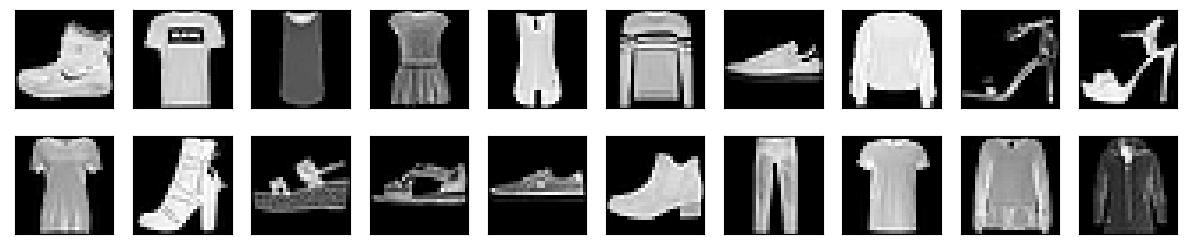

In [10]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

Next, we provide you with code that you can use to create your own artificial neural network (ANN) in terms of a class. We will use a 3-hidden-layer NN with sigmoid activation here. As you should know from the lecture, sigmoid is not a very good choice as it induces vanishing gradients.

* To overcome this issue, create a second nework class in a similar way that again has the same three linear layers but instead uses the ReLU activation function which is known to prevent the gradients from vanishing. Don't change the output activation function.

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [11]:
 class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        x = torch.sigmoid(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

In [12]:
class ANN_relu(nn.Module):
    #Your code for ReLU NN
    
    ## Solution start
    def __init__(self, D_in, D_out):
        super(ANN_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x)
        x = torch.relu(x)
        x = self.linear4(x)
    ## Solution end
        
        return F.log_softmax(x, dim=1)

Next, we provide you with a routine for training a neural network with Pytorch. For each layer, it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command loss.backward() automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [13]:
# This function trains the model for one epoch
# Nothing to do here
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads3 = abs(model.linear3.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads1 = abs(model.linear1.weight.grad)
        grads3_list.append(torch.mean(grads3).item())
        grads2_list.append(torch.mean(grads2).item())
        grads1_list.append(torch.mean(grads1).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print('\nTraining set: Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset))) 
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [14]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

Finally, you are asked to execute the previously built functions. To this end, perform the following tasks:

* We provided the routine for creating the model with the sigmoid function and executing it on the cpu per default. As a first task, you are now asked to create an appropriate optimizer (take a look into imports cell). Use SGD with the parameters of the model and the learning rate and momentum from the hyperparameterlist args created in the beginning.
* Now write a code where you **the function** `train` **for number of** `epochs` **in our hyperparameters collection** `args`  with the required arguments for the **sigmoid model** and create a routine that **plots the output list of means of gradient magnitudes** for each layer appropriately. It should also output the test accuracy.
* Repeat the previous task but for ReLU model.

<h3 style="color:rgb(208,90,80)">Code (20 points)</h3>

<<< Sigmoid >>>

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.355961
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.306077
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.324099
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.298882
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.290107
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.323857
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.300778
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.319376
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.300003
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.284721

Training set: Accuracy: 6460/60000 (10.77%)

Test set: Average loss: 2.2907, Accuracy: 1000/10000 (10.00%)


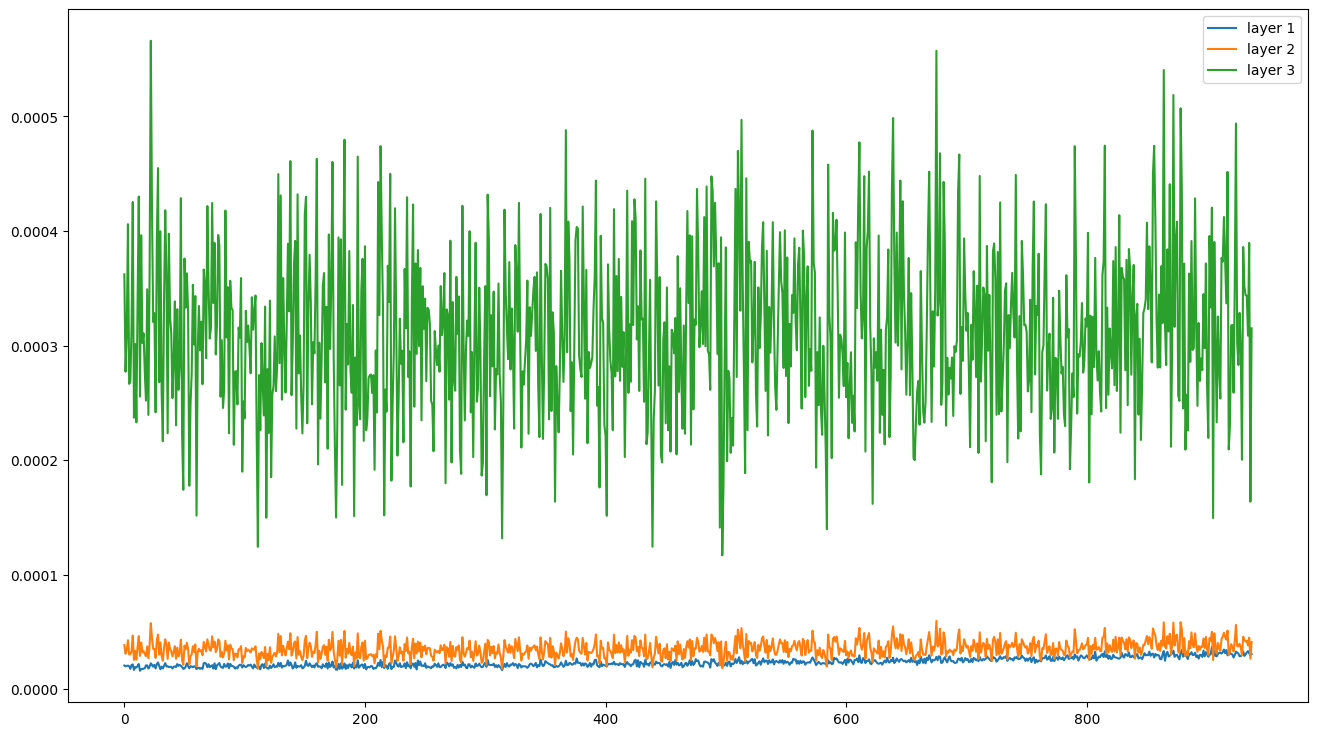

<<< ReLU >>>
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.289949
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.131416
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.671708
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.777431
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.657801
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.585341
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.707256
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.709797
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.454825
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.616140

Training set: Accuracy: 44892/60000 (74.82%)

Test set: Average loss: 0.4905, Accuracy: 8250/10000 (82.50%)


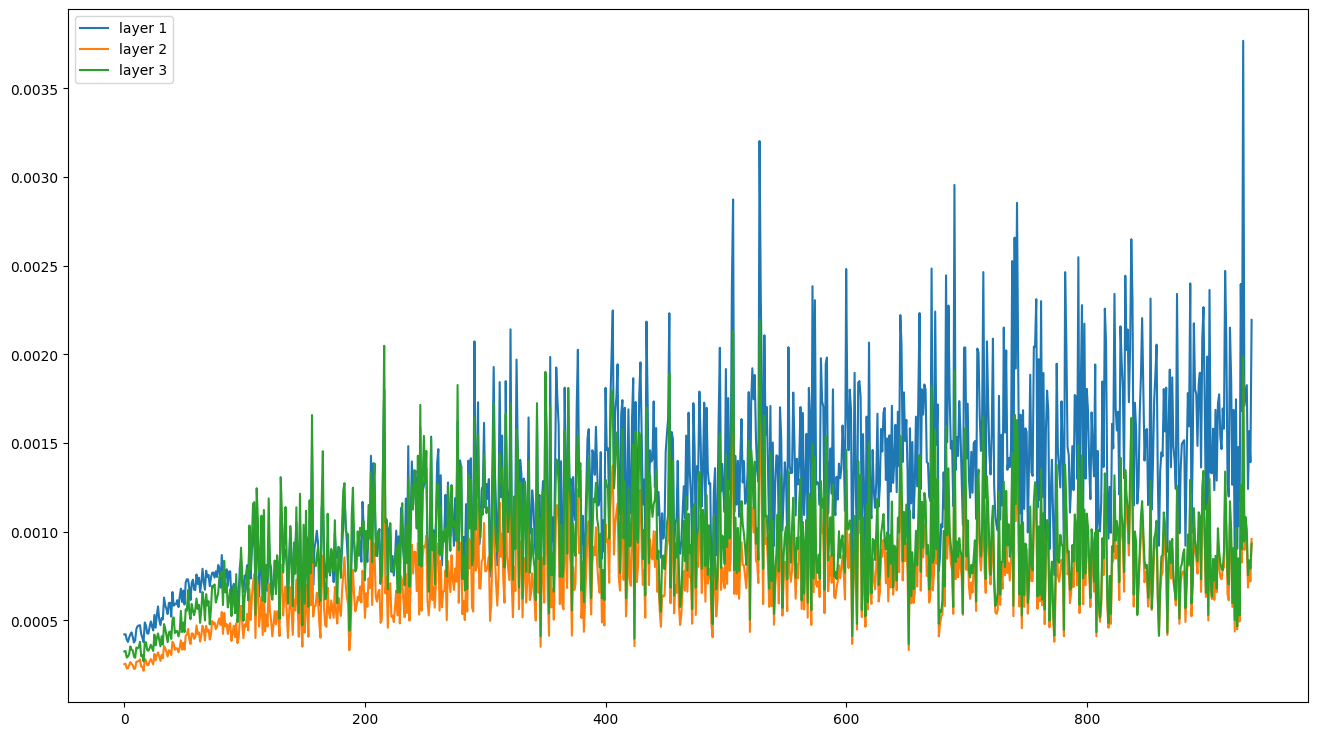

In [18]:
print("<<< Sigmoid >>>\n")
model = ANN_sigmoid(input_dim, output_dim).to(device)

#please use only predefined variables names
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
epochs_range = range(1, args.epochs + 1)

for epoch in epochs_range:
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    
    #plot here together 3 different magnitudes
    test(args, model, device, test_loader)
    plt.figure(figsize=(16,9))
    plt.plot(grads1_list, label='layer 1')
    plt.plot(grads2_list, label='layer 2')
    plt.plot(grads3_list, label='layer 3')
    plt.legend()
    plt.show()
    
    
    #now test your model
    
######################################################################################    
print("<<< ReLU >>>\n")
model = ANN_relu(input_dim, output_dim).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in epochs_range:
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    test(args, model, device, test_loader)
    plt.figure(figsize=(16,9))
    plt.plot(grads1_list, label='layer 1')
    plt.plot(grads2_list, label='layer 2')
    plt.plot(grads3_list, label='layer 3')
    plt.legend()
    plt.show()
    

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations for the sigmoid network and the ReLU network can you make? Tick the correct boxes (several may be correct):

a_)  The sigmoid network trains poorly in only one epoch. <br>
b_)  The means of magnitudes of the gradients for the sigmoid network are significantly higher for lower layers. This is an indication of the vanishing gradient problem. <br>
c_) One reason why the sigmoid network can lead to vanishing gradients might be that the derivative of the sigmoid does not exceed 1/4. <br>
d_)  When you use the ReLU activation function, the resulting network trains well in only one epoch. <br>
e_) One reason why several well-known activation functions different from sigmoid can lead to more stable training can be the fact that their derivatives are always larger than 1.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [19]:
#your answers go here ↓↓↓
a_=True
b_=False
c_=True
d_=True
e_=True

Note, however, there are possible ways to improve the learning of the sigmoid network without changing the activation function and the network size (you are encouraged to make an educated guess and try out several choices), but still, the network archictecture seems to be too simple to really lead to a satisfying performance. In the upcoming assignment, we will further ellaborate on this issue.